# Google play apps dataset - exploratory data analysis

### Universitatea Bucuresti Facultatea de Informatica 

###          Students: Constantin Dinu Vasiliu, Lucian Nut

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import time
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as gro
from plotly import tools
from statistics import *
#import chart_studio.plotly as ply
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
# encoder for the nominal categorical values
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import ensemble

from sklearn.svm import SVR




import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



## Project Content


#### General Data Manipulation<br/>
* [Data Import](#data_import)
* [Generic Data Cleaning](#gdc)

#### Cleaning each feature one by one

* [Reviews](#reviews)
* [Size](#size)
* [Installs](#installs)
* [Price](#price)
* [Genre](#genre)

#### Exploratory Data Analysis
* [Rating Histogram](#rating_histogram)
* [Pie Chart](#pie_chart)
* [Rating by Categories](#rating_by_categories)
* [Apps with most downloads](#most_downloaded)
* [Pairplot](#pairplot)
* [Heatmap](#heatmap)
* [Linear Regression Plot Fits](#lin_reg)


#### Predicting Application Ratings
* [Linear Regression](#lin_reg_algo)
* [K Nearest Neighbours](#knn)
* [Random Forrest Regression](#random_forrest)
* [Support Vector Regression](#svr)
* [Gradient Boosting Regression](#gbr)


### <a id="data_import">Data Import</a>

In [2]:
data = pd.read_csv("./googleplaystore.csv")
data_copy_alg=data
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.shape

(10841, 13)

### General dataset information

In [4]:
data.info()
#we see that although there are 10841 rows to the dataset, there are null values amongst
#we want to reduce in order to be able to use the data for prediction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## DATA CLEANING

## <a id="gdc">Generic Data Cleaning</a>

In [5]:
total_data_number = data.isnull().sum().sort_values(ascending=False)
percent_data_null = (data.isnull().sum()/data.count()).sort_values(ascending=False)
missing_data_array = pd.concat([total_data_number, percent_data_null * 100], axis=1, keys=['Total', 'Percent'])
missing_data_array.head(15)

,Total,Percent
Rating,1474,15.736095
Current Ver,8,0.073848
Android Ver,3,0.027680
Content Rating,1,0.009225
Type,1,0.009225
Last Updated,0,0.000000
Genres,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


By visually inspecting the above table we can see that the highest number of null values is in the variable we will be trying to predict, Rating.

The two strategies that we can use to handle such cases are either dropping the rows with null values or replacing it with a median, or mean value of the column. We have chosen to fill the values so that we don't loose a lot of data.

In [6]:
#fillna with median for rating since we have 1500 rows with nulls, we would loose a lot of data 
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

cleaned_data = data.dropna()
#dropna for other columns
# cleaned data
total_data_number_after = cleaned_data.isnull().sum().sort_values(ascending=False)
percent_data_null_after = (cleaned_data.isnull().sum()/cleaned_data.count()).sort_values(ascending=False)
missing_data_array_after = pd.concat([total_data_number_after, percent_data_null_after], axis=1, keys=['Total', 'Percent'])
missing_data_array_after.head(15)



,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0
Type,0,0.0
Installs,0,0.0
Size,0,0.0
Reviews,0,0.0


In [7]:
# total duplicated entries by the "App" & "Current Ver" columns 1155
duplicates_app_categ = cleaned_data[cleaned_data.duplicated(['App', 'Current Ver'])]

print("Number of duplicates {}".format(duplicates_app_categ.shape))
print("Expected number of rows after cleanup: {}".format(cleaned_data.shape[0] - duplicates_app_categ.shape[0]))

Number of duplicates (1155, 13)
Expected number of rows after cleanup: 9674


In [8]:
# Return DataFrame with duplicate rows removed, optionally only considering certain columns. Indexes, including time indexes are ignored.
cleaned_data = cleaned_data.drop_duplicates(['App', 'Current Ver'])
print("Final table shape without duplicates in 'App' and 'Current Ver': __{}__".format(cleaned_data.shape))

Final table shape without duplicates in 'App' and 'Current Ver': __(9674, 13)__


In [9]:
# Just replace whitespaces with underscore in the headers
cleaned_data.columns = cleaned_data.columns.str.replace(' ', '_')

### Cleaning each feature one by one

### <a id='reviews'>Reviews</a>

In [10]:
# display first 10 number of reviews
cleaned_data['Reviews'].head(10)

0       159
1       967
2     87510
3    215644
4       967
5       167
6       178
7     36815
8     13791
9       121
Name: Reviews, dtype: object

In [11]:
# Let's change each review to int
cleaned_data['Reviews'] = cleaned_data['Reviews'].apply(lambda review: int(review))

### <a id='size'>Size</a>

In [12]:
# display first 10 sizes
cleaned_data['Size'].head(10)

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
5    5.6M
6     19M
7     29M
8     33M
9    3.1M
Name: Size, dtype: object

In [13]:
# Size Frequencies
cleaned_data.Size.value_counts().head(10) # 10 rows selected 

Varies with device    1231
12M                    182
11M                    181
13M                    177
14M                    176
15M                    164
17M                    146
26M                    143
16M                    137
19M                    130
Name: Size, dtype: int64

Let's remove M from the size and also divide each number followed by k wtih 1000 while also removing k.

In [14]:
cleaned_data['Size'] = cleaned_data['Size'].apply(lambda size: str(size).replace('M', '') if 'M' in str(size) else size)
cleaned_data['Size'] = cleaned_data['Size'].apply(lambda size: str(size).replace(',', '') if 'M' in str(size) else size)

# we remove k but we also divide it by 1000 to have a standardized column for the application sizes
cleaned_data['Size'] = cleaned_data['Size'].apply(lambda size: float(str(size).replace('k', '')) / 1000 if 'k' in str(size) else size)

In [15]:
redundant_string = 'Varies with device'

print("There are a total of {} rows with the 'Size' column containing '{}' string.".format(cleaned_data.loc[cleaned_data['Size'] == redundant_string].shape[0], redundant_string))

# Let's replace the redundant string with the average of the Size column, because the number of values that have the redundant string is pretty high and we wouldn't want to loose that data
cleaned_data.head()
avg_value=np.median(cleaned_data['Size'].str.isnumeric().astype(float))

cleaned_data['Size'] = cleaned_data['Size'].apply(lambda x: str(x).replace(redundant_string, str(0)) if redundant_string in str(x) else x)

print("There are a total of {} rows with the 'Size' column containing '{}' string.".format(cleaned_data.loc[cleaned_data['Size'] == redundant_string].shape[0], redundant_string))

There are a total of 1231 rows with the 'Size' column containing 'Varies with device' string.
There are a total of 0 rows with the 'Size' column containing 'Varies with device' string.


In [16]:
cleaned_data['Size'] = cleaned_data['Size'].apply(lambda size: float(size))
cleaned_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


As we can observe above all the sizes in our dataset are now set to a standard measurement data, which is megabytes

### <a id='installs'>Installs</a>

In [17]:
# display first 10 total installs
cleaned_data['Installs'].head(10)

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
Name: Installs, dtype: object

In [18]:
# Install Frequencies
cleaned_data.Installs.value_counts().head(10) # 10 rows selected 

1,000,000+     1421
100,000+       1115
10,000+        1030
10,000,000+     945
1,000+          887
100+            709
5,000,000+      610
500,000+        504
50,000+         468
5,000+          467
Name: Installs, dtype: int64

In [19]:
# We remove the signs from the installs column

cleaned_data['Installs'] = cleaned_data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
cleaned_data['Installs'] = cleaned_data['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
cleaned_data['Installs'] = cleaned_data['Installs'].apply(lambda x: int(x))

Removing the + here is a very logical operation, as this it wouldn't be in a numeric format with the pluses and this is just the format that Google Play uses, it wouldn't bring any additional information that we could use in the regression


### <a id='price'>Price</a>

In [20]:
# display first 5 prices
print(cleaned_data['Price'].head(5))

# display first 5 prices with a value bigger than 0
print(cleaned_data[cleaned_data['Price'] != 0]['Price'].head(5))

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object


In [21]:
paid_apps = cleaned_data[cleaned_data.Price != '0'].shape[0]
print("Total free apps {}".format(cleaned_data.shape[0]- paid_apps))
print("Total paid apps {}".format(paid_apps))

Total free apps 8921
Total paid apps 753


In [22]:
cleaned_data['Price'] = cleaned_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
cleaned_data['Price'] = cleaned_data['Price'].apply(lambda x: float(x))


Removing the $ sign as done to other columns so we can have a numeric column

### <a id='genre'>Genre</a>

In [23]:
# display first 5 genres
print(cleaned_data['Genres'].head(5))

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
Name: Genres, dtype: object


In [24]:
result = cleaned_data[cleaned_data.Genres == 'Adventure;Action & Adventure']
genres = np.unique(cleaned_data['Genres'])
print("There are a total of {} initial genres".format(genres.shape[0]))

There are a total of 119 initial genres


It is obvious that some of the genres must be combined with others..
This is a good example of inconsistent data which must be cleaned

In [25]:
# The idea is that we want to reduce redudant genres or combine 
# the ones which are of the same genre but are marked with different ones;
# More can be added / mixed together; There is no rule but it is about having some sort of a
# correct intuition which is needed in order to logically group them together;
new_genres = {
'Adventure;Action & Adventure'  :  'Action;Action & Adventure',
'Educational;Action & Adventure' : 'Action & Adventure',
'Adventure;Brain Games'   :  'Adventure',
'Adventure;Education'   : 'Adventure',
'Arcade;Pretend Play'   : 'Arcade',
'Art & Design;Pretend Play' : 'Art & Design;Creativity',
'Board;Pretend Play'  : 'Board;Brain Games',
'Books & Reference'  : 'Education',
'Communication;Creativity' : 'Communication',
'Educational;Education'   : 'Education',
'Educational' : 'Education',
'Educational;Brain Games': 'Education;Brain Games',
'Educational;Creativity': 'Education;Creativity',
'Educational;Pretend Play': 'Education;Pretend Play',
'Music;Music & Video' : 'Music',
'Lifestyle;Pretend Play': 'Lifestyle',
'Simulation;Education': 'Simulation',
'Simulation;Pretend Play' : 'Simulation' 
}

for old, new in new_genres.items():
    print("Replacing [{}] GENRE with [{}] GENRE".format(old, new))
    cleaned_data['Genres'] = cleaned_data['Genres'].apply(lambda x: x.replace(old, new) if old in str(x) else x)


Replacing [Adventure;Action & Adventure] GENRE with [Action;Action & Adventure] GENRE
Replacing [Educational;Action & Adventure] GENRE with [Action & Adventure] GENRE
Replacing [Adventure;Brain Games] GENRE with [Adventure] GENRE
Replacing [Adventure;Education] GENRE with [Adventure] GENRE
Replacing [Arcade;Pretend Play] GENRE with [Arcade] GENRE
Replacing [Art & Design;Pretend Play] GENRE with [Art & Design;Creativity] GENRE
Replacing [Board;Pretend Play] GENRE with [Board;Brain Games] GENRE
Replacing [Books & Reference] GENRE with [Education] GENRE
Replacing [Communication;Creativity] GENRE with [Communication] GENRE
Replacing [Educational;Education] GENRE with [Education] GENRE
Replacing [Educational] GENRE with [Education] GENRE
Replacing [Educational;Brain Games] GENRE with [Education;Brain Games] GENRE
Replacing [Educational;Creativity] GENRE with [Education;Creativity] GENRE
Replacing [Educational;Pretend Play] GENRE with [Education;Pretend Play] GENRE
Replacing [Music;Music & V

In [26]:
# just checking the results here 
cleaned_data[cleaned_data.Genres == 'Art & Design;Creativity']

genres = np.unique(cleaned_data['Genres'])
print("There are a total of {} initial genres".format(genres.shape[0]))

There are a total of 100 initial genres


In [27]:
final_data = cleaned_data.copy()

## Exploratory Data Analysis

### <a id="rating_histogram">Rating Histogram</a>

In [28]:
avg_rating = gro.Histogram(
    
    x=final_data.Rating,
    name='Average Rating',
    xbins = {'start': 1, 'size': 0.1, 'end' :5},
    marker=dict(
        color='#546FDE',
    ),
    opacity=0.75
)

fig = tools.make_subplots(rows=1, cols=1)
fig.append_trace(avg_rating, 1, 1)
fig.show()

print('Average Rating {}'.format(np.mean(final_data['Rating'])))
print('Mean Rating {}'.format(np.median(final_data['Rating'])))

C:\Users\const\Anaconda3\envs\PersonalProjects\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Average Rating 4.1767811248825515
Mean Rating 4.2


> We see that most of the apps, the big numbers are somewhere around the 4.5 rating, and the average rating for the entire dataset is 4.17 stars  and the mean rating is 4.2 stars


### <a id="pie_chart">Pie Chart</a>
We try to see what categories of apps are most popular in our dataset, Family and Games seem to be the most popular, Tools being on the first place. The other percentages are divided across a vast number of categories.


In [29]:
counts = final_data['Category'].value_counts()

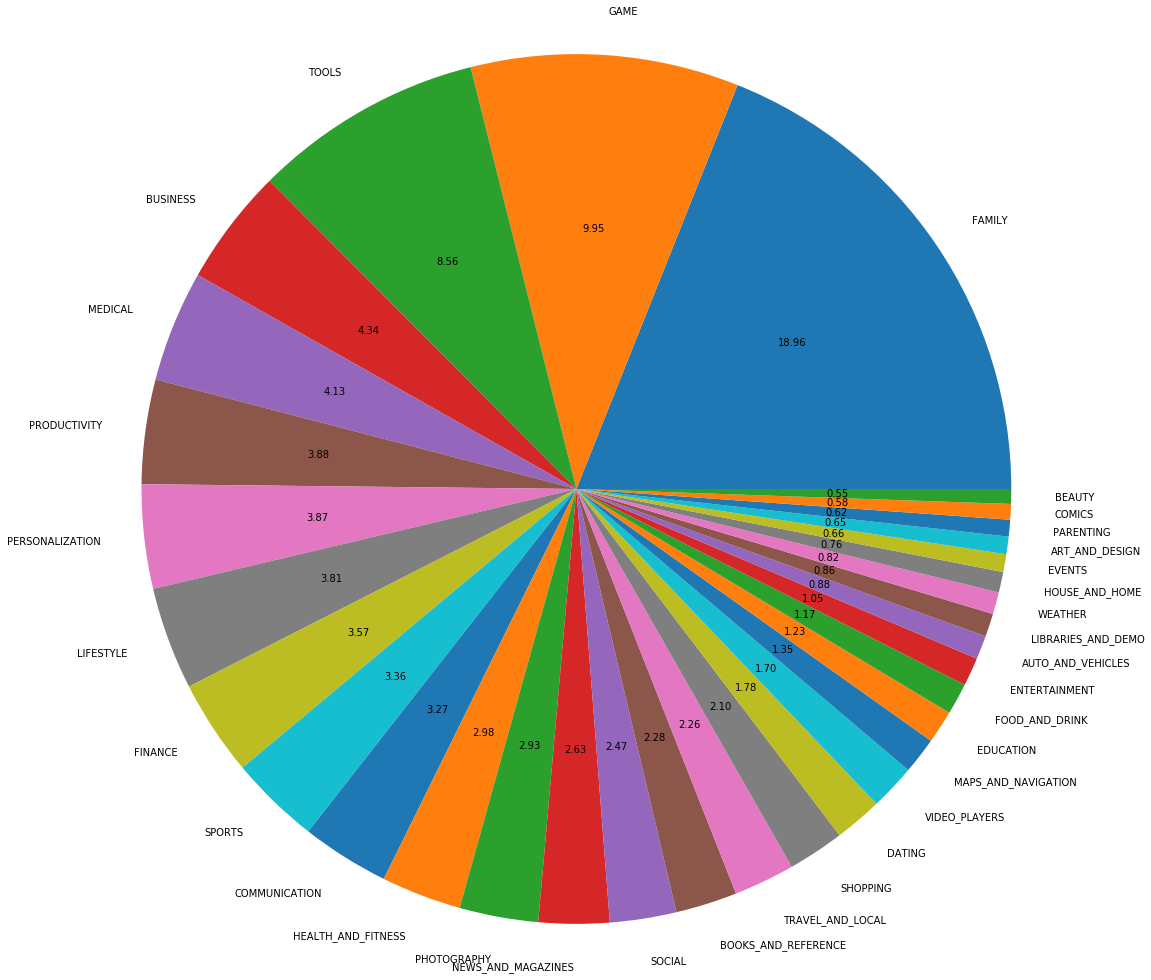

In [30]:
dict_counts=counts.to_dict()
z = plt.pie([float(v) for v in dict_counts.values()], labels=[str(k) for k in dict_counts],radius=5, autopct='%.2f')

### <a id="rating_by_categories">Rating by Categories</a>

In [31]:
list_of_categories = final_data['Category'].unique().tolist()

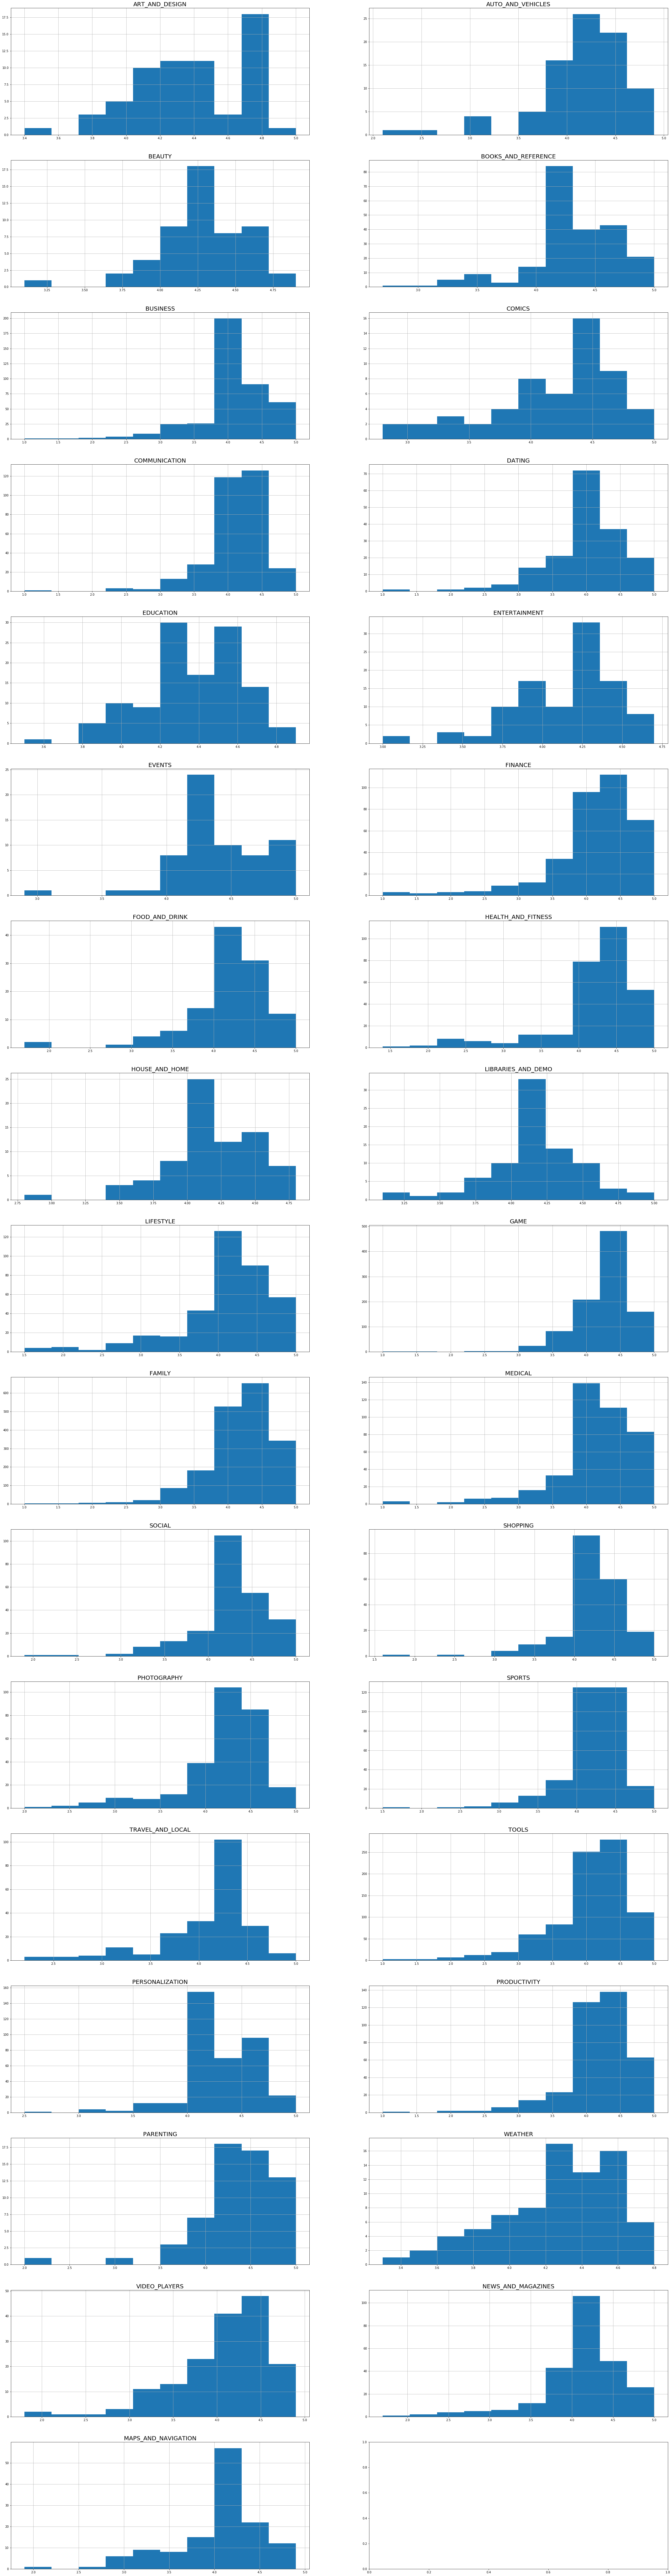

In [32]:
fig, axes = plt.subplots(nrows = 17, ncols = 2)

fig.set_figheight(160)
fig.set_figwidth(40)

c = 0

for row in range(0, axes.shape[0]):
    for column in range(0, axes.shape[1]):
        if c == len(list_of_categories):
            break
        current_subplot = axes[row, column]
        category = list_of_categories[c]
        filtered = final_data.loc[final_data['Category'] == category]['Rating']
        current_subplot.hist(filtered)
        current_subplot.set_title(category,fontsize=20)
        current_subplot.grid()
        c += 1


We would be interested to check is if there is a correlation between application category and application rating, do some applications perform better as an overall of their category compaired to others?

In [33]:
grouped_by_categ = final_data.groupby('Category').filter(lambda x: len(x) >= 100).reset_index()



c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(grouped_by_categ.Category)))]


layout = {'title' : 'App ratings across genres',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(170,250,200)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(grouped_by_categ.Rating)),
              'x1': 23,
              'y1': np.nanmean(list(grouped_by_categ.Rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': final_data.loc[final_data.Category==cat]['Rating'], 
    'type':'violin',
    'name' : cat,
    'showlegend':False,
   
    } for i,cat in enumerate(list(set(grouped_by_categ.Category)))]



plotly.offline.iplot({'data': data, 'layout': layout})


Most app categories perform similarly, with a few overpeformers such as **books_and_reference and health_and_fitness** and some underperformers as well such as **dating**

### <a id="most_downloaded">Most downloaded apps and their type: paid or free</a>

### <a id="pairplot">Pairplot -  analysis used to identify patterns or associations between features.</a>

([<matplotlib.patches.Wedge at 0x1ec6b6fe188>,
 [Text(1.174335898936199, 0.2468505549309331, 'Paid'),
  Text(-0.17126867081881753, 1.187715051010113, 'Free'),
  Text(-1.1950778948057827, 0.10857635721730022, 'Paid'),
  Text(-0.031951368031600605, -1.1995745537818439, 'Free')])

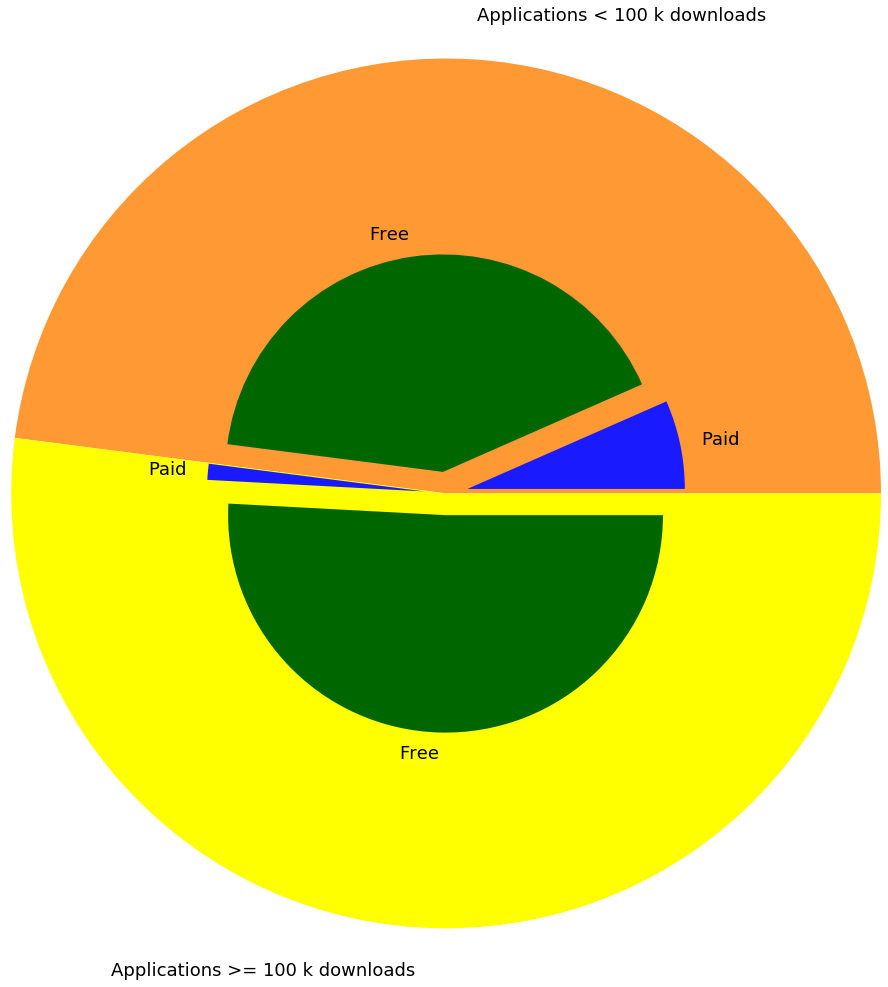

In [34]:
plt.figure(figsize=(10,10))

lbl_ext=['Applications < 100 k downloads', 'Applications >= 100 k downloads']
pie_size_high_low=list()
pie_size_high_low.append(final_data['App'][final_data['Installs']<100000].count()) 
pie_size_high_low.append(final_data['App'][final_data['Installs']>=100000].count()) 

lbl_interior=['Paid', 'Free', 'Paid', 'Free']
pie_inner_size=list()
pie_inner_size.append(final_data['Type'][final_data['Type']=='Paid'][final_data['Installs']<100000].count()) 
pie_inner_size.append(final_data['Type'][final_data['Type']=='Free'][final_data['Installs']<100000].count()) 
pie_inner_size.append(final_data['Type'][final_data['Type']=='Paid'][final_data['Installs']>=100000].count()) 
pie_inner_size.append(final_data['Type'][final_data['Type']=='Free'][final_data['Installs']>=100000].count())


colors = ['#ff9933', '#ffff00']
colors_inner = ['#1a1aff','#006600', '#1a1aff','#006600']

explode = (0,0) 
explode_inner = (0.1,0.1,0.1,0.1)

#pie chart with apps that are downloaded vs apps that are not
plt.pie(pie_size_high_low,explode=explode,labels=lbl_ext, radius=2, colors=colors, textprops={'fontsize': 18})
#pie chart with apps interior with free vs paid apps
plt.pie(pie_inner_size,explode=explode_inner,labels=lbl_interior, radius=1, colors=colors_inner, textprops={'fontsize': 18})
       



([<matplotlib.patches.Wedge at 0x1ec6b68afc8>,
 [Text(1.1936069649371104, 0.12370292338348357, 'Paid'),
  Text(0.0050659696117834364, 1.1999893065989766, 'Free'),
  Text(-1.1967409365486208, 0.08838060188033639, 'Paid'),
  Text(0.04052067845367969, -1.1993156692954752, 'Free')])

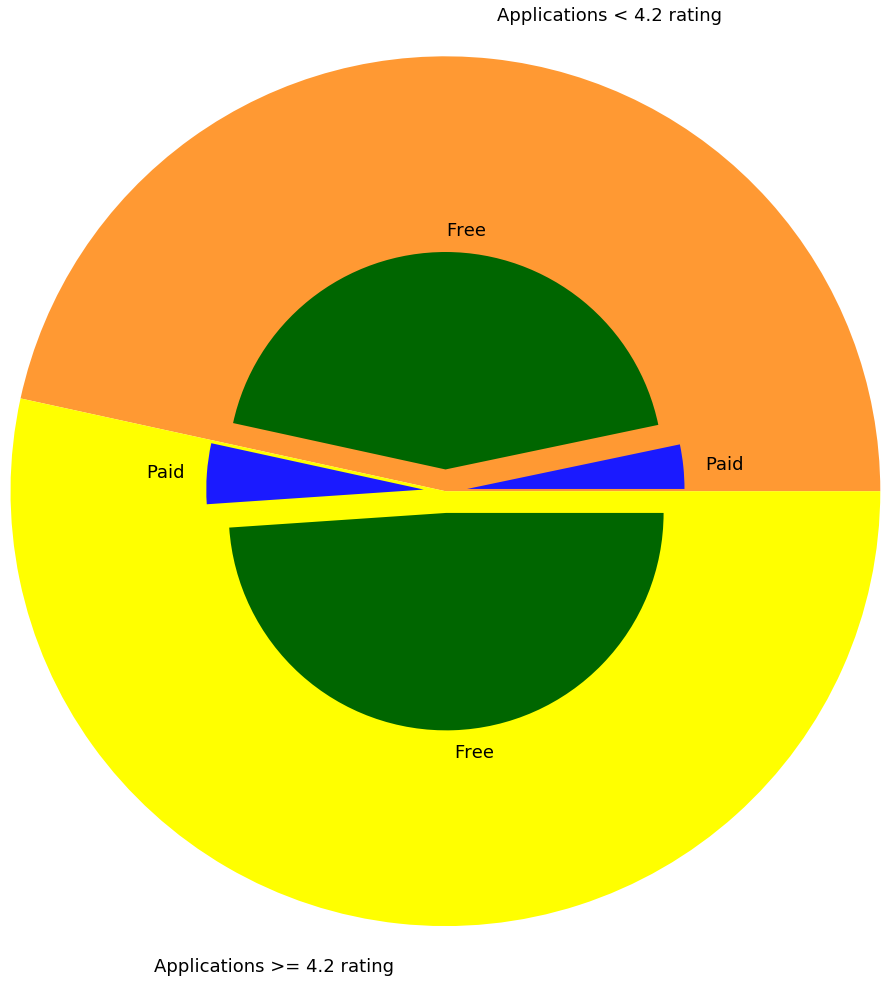

In [35]:
plt.figure(figsize=(10,10))

lbl_ext=['Applications < 4.2 rating', 'Applications >= 4.2 rating']
pie_size_high_low=list()
pie_size_high_low.append(final_data['App'][final_data['Rating']<4.2].count()) 
pie_size_high_low.append(final_data['App'][final_data['Rating']>=4.2].count()) 

lbl_interior=['Paid', 'Free', 'Paid', 'Free']
pie_inner_size=list()
pie_inner_size.append(final_data['Type'][final_data['Type']=='Paid'][final_data['Rating']<4.2].count()) 
pie_inner_size.append(final_data['Type'][final_data['Type']=='Free'][final_data['Rating']<4.2].count()) 
pie_inner_size.append(final_data['Type'][final_data['Type']=='Paid'][final_data['Rating']>=4.2].count()) 
pie_inner_size.append(final_data['Type'][final_data['Type']=='Free'][final_data['Rating']>=4.2].count())


colors = ['#ff9933', '#ffff00']
colors_inner = ['#1a1aff','#006600', '#1a1aff','#006600']

explode = (0,0) 
explode_inner = (0.1,0.1,0.1,0.1)

#pie chart with apps that are downloaded vs apps that are not
plt.pie(pie_size_high_low,explode=explode,labels=lbl_ext, radius=2, colors=colors, textprops={'fontsize': 18})
#pie chart with apps interior with free vs paid apps
plt.pie(pie_inner_size,explode=explode_inner,labels=lbl_interior, radius=1, colors=colors_inner, textprops={'fontsize': 18})
       



C:\Users\const\Anaconda3\envs\PersonalProjects\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\const\Anaconda3\envs\PersonalProjects\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



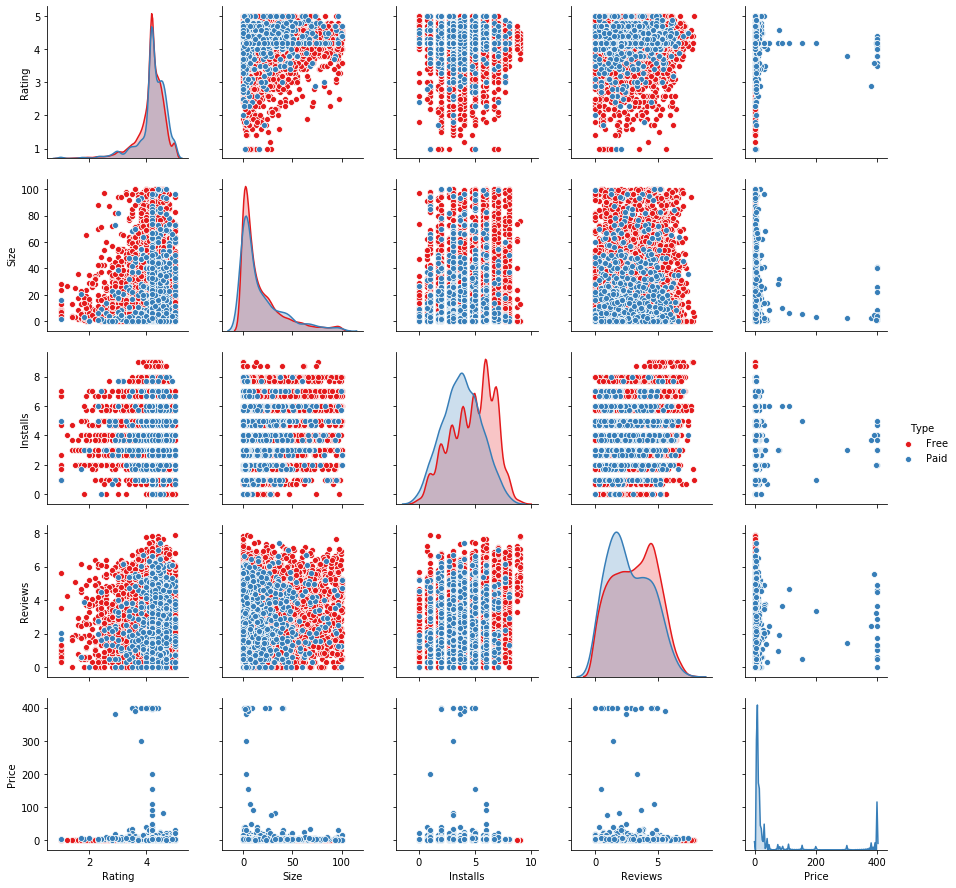

In [36]:
install_data = final_data['Installs'][final_data.Installs !=0]
review_data = final_data['Reviews'][final_data.Reviews !=0]
app_type_data = final_data['Type']
price_data = final_data['Price']


#using log to better represent the installs and reviews since these tend to get very large
p = sns.pairplot(pd.DataFrame(list(zip(final_data['Rating'], 
                                       final_data['Size'], 
                                       np.log10(install_data), 
                                       np.log10(review_data), 
                                       app_type_data, 
                                       price_data)), 
                columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), 
                hue='Type', palette="Set1")

### <a id="heatmap">Heatmap</a>

In [37]:
# Last Updated encoding
final_data['Last_Updated'] = final_data['Last_Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))
final_data.head()
#we want to see if there is a correlation between the last update date of the application
#and its rating, but for this we need to have that date in a kind of numeric format, so we change it to the number of days
#there have been from the last update compared to the most recently updated app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.515276e+09,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Creativity,1.515967e+09,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.533071e+09,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,1.528405e+09,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.529442e+09,1.1,4.4 and up


In [38]:
relationships = final_data.corr()

In [39]:
trace = go.Heatmap(z=[relationships.Rating.values.tolist(), relationships.Reviews.values.tolist(), relationships.Size.values.tolist(), relationships.Installs.values.tolist(), relationships.Price.values.tolist(), relationships.Last_Updated.values.tolist()],
                   x=[relationships.columns[0], relationships.columns[1], relationships.columns[2], relationships.columns[3], relationships.columns[4],relationships.columns[5]],
                   y=[relationships.columns[0], relationships.columns[1], relationships.columns[2], relationships.columns[3], relationships.columns[4], relationships.columns[5]])
corelation=[trace]
py.iplot(corelation, filename='heatmap')

Computing this heatmap should give us a basic intuition on what we should be looking at that influences the rating most.

We can see that the things that are most correlated to changes in rating are when the app was **last_updated***, the app's **reviews and rating**. We will investigate this further

### <a id="lin_reg">Linear Regression Plot Fits</a>

Text(0.5, 1.0, 'Influence of Reviews on Rating')

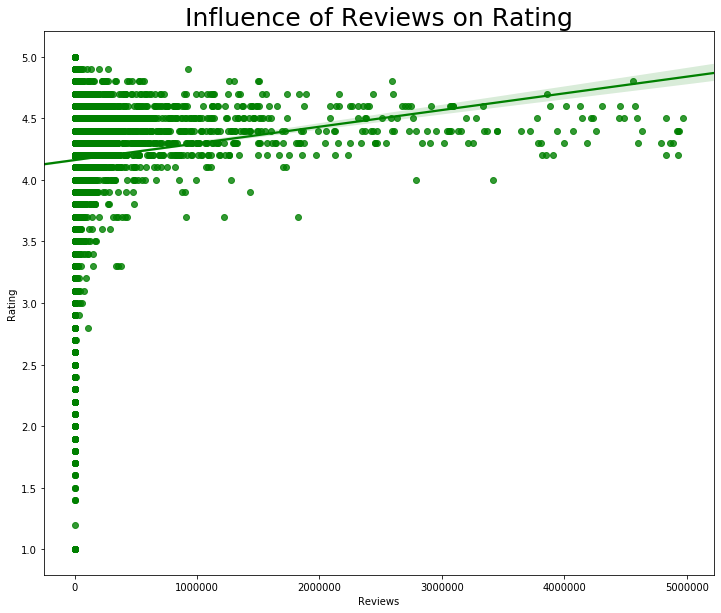

In [40]:
plt.figure(figsize = (12,10))
#print(final_data[final_data['Reviews']>=5000000].count()[0]) -result is 83
sns.regplot(x="Reviews", y="Rating", color = 'green',data=final_data[final_data['Reviews']<=5000000]);
plt.title('Influence of Reviews on Rating',size = 25)


We apply a filter on the applications, to keep just those with <5 000 000 ratings as there are very few that have more than that (83) apps, some of these few having incredibly high numbers of reviews and it would distort the graph, all the points would be very crowded and it wouldn't be as clear.

We can observe a basic tendency, that applications with more reviews also get higher ratings. This is a logical finding as you would presume that apps that are used a lot by people would be good apps.

We should assume that reviews will be a good predictor for rating.

Text(0.5, 1.0, 'Influence of Installs on Rating')

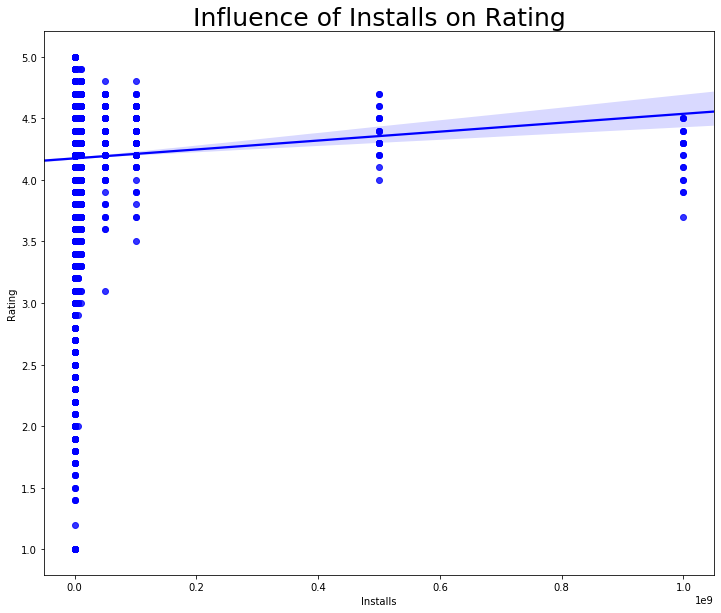

In [41]:
plt.figure(figsize = (12,10))

sns.regplot(x="Installs", y="Rating", color = 'blue',data=final_data);
plt.title('Influence of Installs on Rating',size = 25)


Here we do the same analysis as above, we see the points being just on specific lines and this does make sense since Google Play doesn't tell you the exact number of installs but rather if it is above a threshold.

The tendendcy is similar to what we have seen in the Reviews, apps with high numbers of Installs will be generally more well received and have a higher rating. Popular apps are better rated.


Text(0.5, 1.0, 'Influence of Price on Rating')

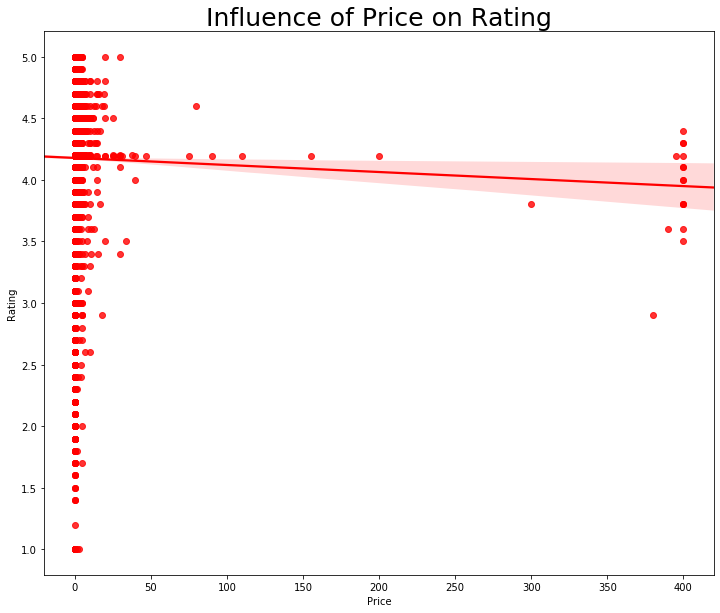

In [42]:
plt.figure(figsize = (12,10))

sns.regplot(x="Price", y="Rating", color = 'red',data=final_data);
plt.title('Influence of Price on Rating',size = 25)

It is very interesting that here we observe the inverse tendency of what we have observed in the previous two analysis. 

People seem to want more from apps with bigger price tags and thus apps with higher prices get ratings smaller than those that are free or cost a small amount.

Text(0.5, 1.0, 'Influence of when app was Last Updated on Rating')

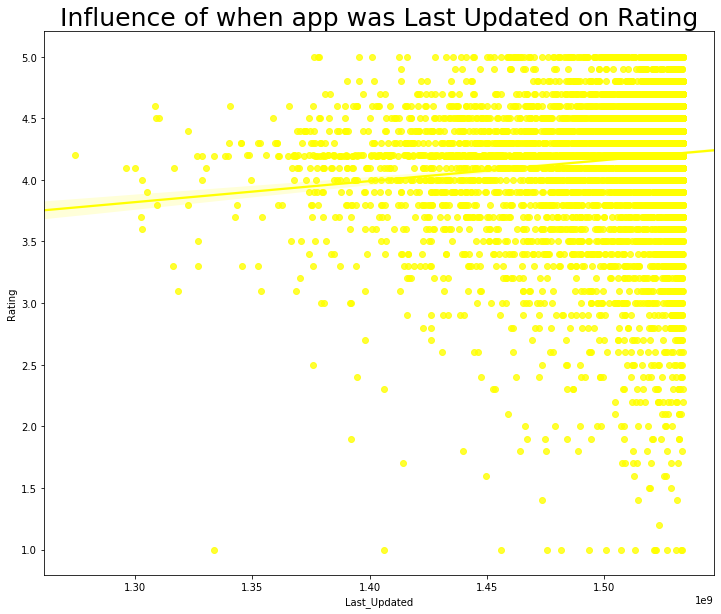

In [43]:
plt.figure(figsize = (12,10))

sns.regplot(x="Last_Updated", y="Rating", color = 'yellow',data=final_data);
plt.title('Influence of when app was Last Updated on Rating',size = 25)



Analyzing the data, we can also see a  correlation between when the app was last updated and its rating. It makes sense since apps where the developers keep working recieve better ratings since they implement the user feedback, but abandoned apps remain with bugs, etc. and receive bad ratings.

### <a id="prediction">Predicting Application Ratings</a>

We first need to define a function that will calculate how well our algorithms perform, so we can measure their performance




In [44]:
#using a function to evaluate the accuracy will give us a standardised metric to pass all our methods through
#so we can know which one performed best
def AccuracyMetrics(dataset_y, predicted_y, printing=1):
    if printing==1:
        print ('mean squared error: '+ str(metrics.mean_squared_error(dataset_y,predicted_y)))
        print ('mean absolute error: '+ str(metrics.mean_absolute_error(dataset_y,predicted_y)))
        print ('mean squared log error: '+ str(metrics.mean_squared_log_error(dataset_y,predicted_y)))
    return metrics.mean_squared_error(dataset_y,predicted_y)





**Categorical Data Encoding**

In [45]:
categories=pd.get_dummies(final_data['Category'],prefix='catg',drop_first=True)
categories=pd.get_dummies(final_data['Genres'],prefix='gen',drop_first=True)
types=pd.get_dummies(final_data['Type'],prefix='typ',drop_first=True)
contentRatings=pd.get_dummies(final_data['Content_Rating'],prefix='cr',drop_first=True)
new_data=[final_data,categories,types,contentRatings]
final_data=pd.concat(new_data,axis=1)
final_data.drop(['Category','Type','Content_Rating','Genres'],axis=1,inplace=True)
final_data.head()


,App,Rating,Reviews,Size,Installs,Price,Last_Updated,Current_Ver,Android_Ver,gen_Action & Adventure,...,gen_Video Players & Editors;Creativity,gen_Video Players & Editors;Music & Video,gen_Weather,gen_Word,typ_Paid,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,0.0,1.515276e+09,1.0.0,4.0.3 and up,0,...,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.9,967,14.0,500000,0.0,1.515967e+09,2.0.0,4.0.3 and up,0,...,0,0,0,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000,0.0,1.533071e+09,1.2.4,4.0.3 and up,0,...,0,0,0,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,0.0,1.528405e+09,Varies with device,4.2 and up,0,...,0,0,0,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0.0,1.529442e+09,1.1,4.4 and up,0,...,0,0,0,0,0,1,0,0,0,0


Also we need to split the data into train and test so we can fit the algorithm on a set of data and then check it's accuracy on the test set. We choose a split of 75% train 25% test which is actually pretty common.

In [46]:
X=final_data.drop('Rating',axis=1)

# take out the Rating which will be predicted
y=final_data['Rating'].values
#move it into y which will be the predicted vector and transform to int
y=y.astype('int')
X=X.drop(['App','Current_Ver','Android_Ver'],axis=1)
X.head()




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

 <a id="lin_reg_algo">Linear Regression</a>

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy = AccuracyMetrics(y_test,y_pred,1)

print (accuracy)

mean squared error: 0.29793313583174724
mean absolute error: 0.37386720030320036
mean squared log error: 0.017531566369035956
0.29793313583174724


 <a id="knn">K Nearest Neighbours</a>

In [48]:
model = KNeighborsRegressor(n_neighbors=200,weights='distance')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)



mean squared error: 0.35331394119427284
mean absolute error: 0.38283245957480116
mean squared log error: 0.02071947041382352
0.35331394119427284


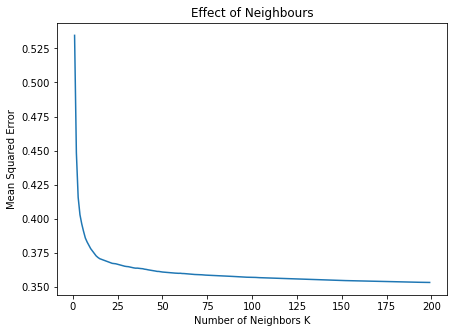

In [49]:
accuracy = AccuracyMetrics(y_test,y_pred,1)

print (accuracy)
# Try different numbers of n_estimators - this will take a minute or so
n_neighbors = np.arange(1, 200, 1)
scores = []
for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    scores.append(AccuracyMetrics(y_test, y_pred,0))
    
plt.figure(figsize=(7, 5))
plt.title("Effect of Neighbours")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Mean Squared Error")
plt.plot(n_neighbors, scores)


 <a id="random_forrest">Random Forrest Regression</a>

In [50]:
RFregressor = RandomForestRegressor(max_depth=2, random_state=0)
RFregressor.fit(X, y)
y_pred=RFregressor.predict(X_test)
print(y_pred)

accuracy = AccuracyMetrics(y_test,y_pred,1)
print (accuracy)


[3.64567797 3.89011883 3.8827299  ... 3.89011883 3.89011883 3.65271468]
mean squared error: 0.27373863641538865
mean absolute error: 0.36800950431176055
mean squared log error: 0.016329326149693988
0.27373863641538865


In [51]:
estimators = [10,20,30,40,50,60,70,80,90,100]
max_depth=[5,10,15,20,25,30,35,40,45,50]

scores = []
minimum_score=100;
best_estimator=0;
best_depth=0;
for n in estimators:
    new_score_line=[]
    for d in max_depth:
        RFregressor.set_params(n_estimators=n, max_depth=d)
        RFregressor.fit(X_train, y_train)
        y_pred=RFregressor.predict(X_test)
        mse=AccuracyMetrics(y_test, y_pred,0)
        if (mse<minimum_score):
            minimum_score=mse
            best_estimator=n
            best_depth=d
        new_score_line.append(mse)
    scores.append(new_score_line)

print(minimum_score)
print(best_estimator)
print(best_depth)

heaatmap_data = go.Heatmap(z=scores,
                   x=max_depth,
                   y=estimators)
heatmapm=[heaatmap_data]
py.iplot(heatmapm, filename='heatmap')

0.25978644488054153
100
10


 <a id="svr">Support Vector Regression</a>

In [52]:
SVRegressor = SVR(C=1.0, epsilon=0.2)
SVRegressor.fit(X, y)
y_pred=SVRegressor.predict(X_test)
print(y_pred)

accuracy_initial = AccuracyMetrics(y_test,y_pred,1)


[3.80010609 3.80007899 3.80017912 ... 3.80010493 3.80010344 3.80014318]
mean squared error: 0.3045721290082893
mean absolute error: 0.3851362312064044
mean squared log error: 0.017941750420083162


[0.5403863078598533, 0.3045778448726548]


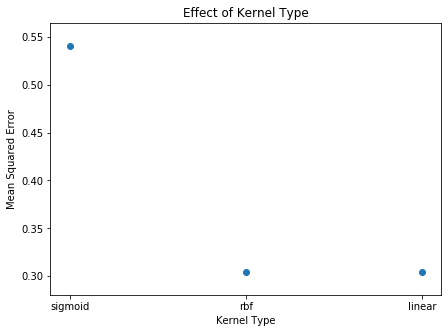

In [53]:
kernels = ['sigmoid','rbf']


svr_scores = []
minimum_score=100;

for k in kernels:
   
    
    SVRegressor.set_params(kernel=k)
    SVRegressor.fit(X_train, y_train)
    y_pred=SVRegressor.predict(X_test)
    mse=AccuracyMetrics(y_test, y_pred,0)
    svr_scores.append(mse)
    if (mse<minimum_score):
        minimum_score=mse
        
            
      
    


print(svr_scores)
svr_scores.append(accuracy_initial)
kernels.append('linear')
plt.figure(figsize=(7, 5))
plt.title("Effect of Kernel Type")
plt.xlabel("Kernel Type")
plt.ylabel("Mean Squared Error")
plt.scatter(kernels, svr_scores)

 <a id="gbr">Gradient Boosting Regression</a>

In [54]:
params = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
GBSRegressor = ensemble.GradientBoostingRegressor(**params)
GBSRegressor.fit(X_train, y_train)
y_pred=GBSRegressor.predict(X_test)
mse=AccuracyMetrics(y_test, y_pred,0)
print(mse)




0.2704031251190722
